In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd  #cv
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('android.csv')

In [3]:
data

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,ping,0.000,5.000,0.000,10.0,1.030,164.64,146.36,0.61,2.72,58266.0,26.43,85861,111.667,19973.0,2060667,0
1,curl,0.014,5.000,0.601,14.0,0.072,317.32,255.84,18.07,0.18,135878.0,7.95,75561,86.263,13152.0,2119754,0
2,top,0.005,0.219,0.060,6.0,0.071,247.85,266.19,11.33,0.24,104448.0,3.49,54497,106.584,4657.0,1781822,0
3,unzip,0.001,0.717,0.000,16.0,0.012,2346.59,2664.54,79.12,0.34,93458.0,14.89,97912,73.217,7863.0,2349887,0
4,system-monitor,0.182,11.000,0.181,4.0,1.527,60.68,48.13,0.88,0.69,289124.0,2.14,87246,23.621,19071.0,2140178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,41089,0.337,1.000,0.000,49.0,1.054,149.29,125.43,1.00,1.50,100617.0,11.06,95818,123.367,15136.0,2299597,1
66,41375,0.038,0.204,0.020,18.0,1.496,61.99,47.42,1.04,0.60,321071.0,3.94,95535,31.285,13880.0,2356069,1
67,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
68,43552,0.630,0.000,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652,1


In [57]:
data.columns[0]

'name'

In [4]:
data.shape

(70, 17)

In [5]:
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
data.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles,malware
0,head,0.093,5.000,0.190,13.0,0.803,157.03,109.53,2.72,0.58,348305.0,2.16,94846,58.688,12534.0,2276301,0
1,browser,0.571,2.000,0.099,15.0,1.368,58.01,47.29,0.75,0.77,214333.0,3.67,73294,30.224,17894.0,1716287,0
2,42485,0.001,0.781,0.000,40.0,0.314,381.38,314.04,3.05,1.25,93834.0,13.17,94456,119.862,12337.0,2266964,1
3,stickynotes,0.043,2.000,0.100,12.0,1.335,57.79,42.12,1.05,0.55,317460.0,3.86,88320,36.630,14588.0,2151632,0
4,calculator,0.062,2.000,0.189,5.0,1.100,48.84,35.02,0.96,0.51,231173.0,2.78,77247,42.083,13365.0,2000843,0


In [7]:
import seaborn as sns

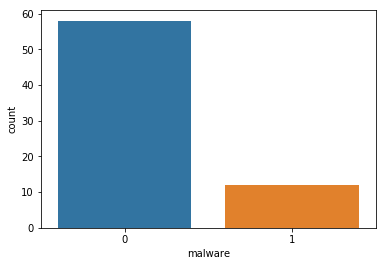

In [8]:
sns.countplot(x='malware',data=data)

In [9]:
target_count = data.malware.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 58
Class 1: 12


In [10]:
count_class_0, count_class_1 = data.malware.value_counts()

In [11]:
df_class_0 = data[data['malware'] == 0]
df_class_1 = data[data['malware'] == 1]

In [12]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)


In [13]:
df_test_over.shape

(116, 17)

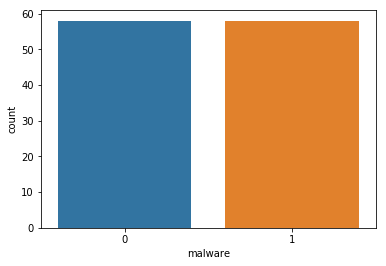

In [14]:
sns.countplot(x='malware',data=df_test_over)

In [15]:
X=df_test_over.iloc[:,df_test_over.columns !='malware']
Y=df_test_over.iloc[:,df_test_over.columns =="malware"]

In [16]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
0,head,0.093,5.0,0.190,13.0,0.803,157.03,109.53,2.72,0.58,348305.0,2.16,94846,58.688,12534.0,2276301
1,browser,0.571,2.0,0.099,15.0,1.368,58.01,47.29,0.75,0.77,214333.0,3.67,73294,30.224,17894.0,1716287
3,stickynotes,0.043,2.0,0.100,12.0,1.335,57.79,42.12,1.05,0.55,317460.0,3.86,88320,36.630,14588.0,2151632
4,calculator,0.062,2.0,0.189,5.0,1.100,48.84,35.02,0.96,0.51,231173.0,2.78,77247,42.083,13365.0,2000843
7,ls,0.579,19.0,0.000,26.0,0.297,359.57,359.34,4.99,0.72,153480.0,7.36,87639,95.313,12128.0,2103360


In [17]:
Y.head()

,malware
0,0
1,0
3,0
4,0
7,0


In [18]:
from sklearn.utils import shuffle

In [19]:
X, Y=shuffle(X, Y)

In [20]:
X.head()

,name,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
10,43552,0.630,0.000,0.000,44.00,0.165,803.32,664.66,6.28,1.28,102347.000,12.31,93360,108.567,13169.0,2240652
67,spotify,0.370,5.000,0.467,15.00,1.354,63.32,51.43,0.74,0.86,198348.000,3.05,78884,41.534,19218.0,1925909
6,41375,0.038,0.204,0.020,18.00,1.496,61.99,47.42,1.04,0.60,321071.000,3.94,95535,31.285,13880.0,2356069
9,help,0.179,3.000,0.385,18.00,0.610,41.89,34.70,1.01,0.42,182.384,2.47,55528,34.303,12954.0,1563441
5,40079,1.099,0.130,0.052,0.11,0.447,71.78,79.23,0.16,4.86,24759.000,2.11,45507,92.371,8874.0,1093187


In [21]:
X=X.drop(columns='name')
X.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
10,0.630,0.000,0.000,44.00,0.165,803.32,664.66,6.28,1.28,102347.000,12.31,93360,108.567,13169.0,2240652
67,0.370,5.000,0.467,15.00,1.354,63.32,51.43,0.74,0.86,198348.000,3.05,78884,41.534,19218.0,1925909
6,0.038,0.204,0.020,18.00,1.496,61.99,47.42,1.04,0.60,321071.000,3.94,95535,31.285,13880.0,2356069
9,0.179,3.000,0.385,18.00,0.610,41.89,34.70,1.01,0.42,182.384,2.47,55528,34.303,12954.0,1563441
5,1.099,0.130,0.052,0.11,0.447,71.78,79.23,0.16,4.86,24759.000,2.11,45507,92.371,8874.0,1093187


In [22]:
Y.head()

,malware
10,1
67,0
6,1
9,0
5,1


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [25]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

,Specs,Score
9,branches,666951.436659
14,ref-cycles,639315.603832
6,stalled-cycles-backend-percent,125168.356934
11,bus-cycle,68591.022338
5,stalled-cycles-frontend-percent,39349.239192
13,cache-references,3732.911598
7,Instructions-per-cycle,2764.432187
12,cache-misses-percent,342.513470
3,page-faults,190.837745
10,branch-misses-percent,91.293713


[0.09221458 0.0462853  0.04038023 0.06632905 0.04349049 0.02713127
 0.02888297 0.03033944 0.15171018 0.07279712 0.13262701 0.07158998
 0.08231776 0.03657104 0.07733359]


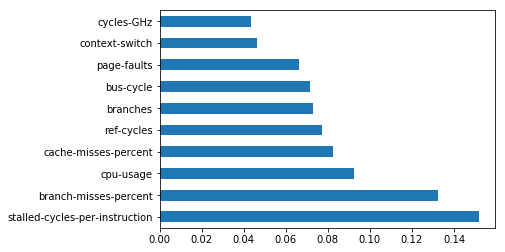

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [28]:
X_train.shape

(92, 15)

In [29]:
X_train.head()

,cpu-usage,context-switch,cpu-migration,page-faults,cycles-GHz,stalled-cycles-frontend-percent,stalled-cycles-backend-percent,Instructions-per-cycle,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,cache-references,ref-cycles
10,0.630,0.0,0.000,44.0,0.165,803.32,664.66,6.28,1.28,102347.0,12.31,93360,108.567,13169.0,2240652
26,0.655,2.0,0.682,35.0,0.312,437.40,360.90,3.01,1.45,92388.0,12.67,93516,109.877,15086.0,2244389
68,0.556,0.0,0.000,65.0,1.066,133.91,106.30,1.32,1.02,139637.0,12.68,96941,82.830,16397.0,2326595
49,0.135,2.0,0.146,54.0,0.545,73.32,65.54,1.66,0.44,165361.0,3.35,73730,45.044,11337.0,1989286
19,0.124,3.0,0.103,3.0,1.213,54.35,44.61,0.81,0.67,254608.0,2.77,80606,27.795,13921.0,2046050


In [30]:
y_train.head()

,malware
10,1
26,1
68,1
49,0
19,0


In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [32]:
from sklearn import svm
support = svm.LinearSVC(random_state=20)

In [33]:
support.fit(X_train,y_train)

LinearSVC(random_state=20)

In [34]:
y_pred = support.predict(X_test)

In [35]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [36]:
model1=metrics.accuracy_score(y_test,y_pred)
print(model1)

0.7916666666666666


In [37]:
cnf_matrix = confusion_matrix(y_test,y_pred)

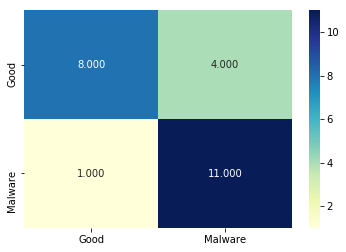

In [38]:
labels = ['Good','Malware']
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier 

In [40]:
tree = DecisionTreeClassifier() 

In [41]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred = tree.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [43]:
model2=metrics.accuracy_score(y_test,y_pred)
print(model2)

0.9583333333333334


In [44]:
cnf_matrix = confusion_matrix(y_test,y_pred)

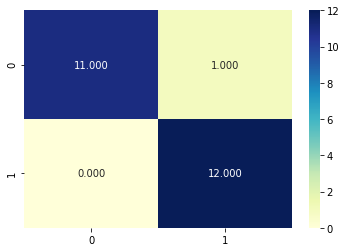

In [45]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
clf = GaussianNB()

In [48]:
clf.fit(X, Y)

GaussianNB()

In [49]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [50]:
model3=metrics.accuracy_score(y_test,y_pred)
print(model3)

0.7083333333333334


In [51]:
cnf_matrix = confusion_matrix(y_test,y_pred)

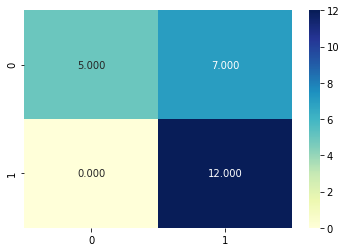

In [52]:
labels = [0,1]
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()

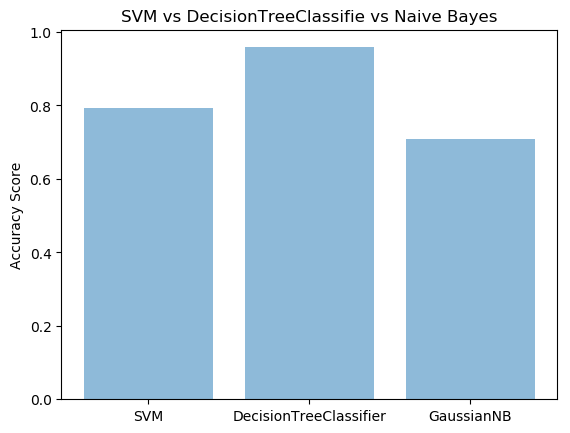

In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('SVM','DecisionTreeClassifier','GaussianNB')
y_pos = np.arange(len(objects))
performance = [model1,model2,model3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('SVM vs DecisionTreeClassifie vs Naive Bayes')

plt.show()

In [65]:
data_X = data.iloc[:,[1,2,4, 5,9, 10,11,12,13,15]]

In [61]:
data_X

,cpu-usage,context-switch,page-faults,cycles-GHz,stalled-cycles-per-instruction,branches,branch-misses-percent,bus-cycle,cache-misses-percent,ref-cycles
0,0.093,5.000,13.0,0.803,0.58,348305.0,2.16,94846,58.688,2276301
1,0.571,2.000,15.0,1.368,0.77,214333.0,3.67,73294,30.224,1716287
2,0.001,0.781,40.0,0.314,1.25,93834.0,13.17,94456,119.862,2266964
3,0.043,2.000,12.0,1.335,0.55,317460.0,3.86,88320,36.630,2151632
4,0.062,2.000,5.0,1.100,0.51,231173.0,2.78,77247,42.083,2000843
...,...,...,...,...,...,...,...,...,...,...
65,0.454,0.269,15.0,1.664,0.25,558519.0,1.93,94788,35.549,2296454
66,0.157,4.000,41.0,0.922,0.75,81212.0,13.95,72923,85.676,2313615
67,0.370,5.000,15.0,1.354,0.86,198348.0,3.05,78884,41.534,1925909
68,0.556,0.000,65.0,1.066,1.02,139637.0,12.68,96941,82.830,2326595


In [62]:
data_Y=data['malware']

In [63]:
data_Y

0     0
1     0
2     1
3     0
4     0
     ..
65    0
66    0
67    0
68    1
69    0
Name: malware, Length: 70, dtype: int64

In [56]:
import pickle
pickle.dump(tree, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))